# ---------------------------------RANDOM-FOREST-------------------------------------

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import csv
from ipykernel import kernelapp as app
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing, cross_validation


In [6]:
df = pd.read_csv(open('/Users/sonalichaudhari/Desktop/Combine.csv','rU'), encoding='utf-8') 

In [8]:
loan_df = pd.read_csv('/Users/sonalichaudhari/Desktop/Loan.csv', low_memory=False) 
decline_df= pd.read_csv(open('/Users/sonalichaudhari/Desktop/Decline.csv','rU'), encoding='utf-8')
loan_df=loan_df[['id','loan_amnt', 'purpose', 'fico', 'dti','zip_code', 'State', 'emp_length', 'Year', 'Month', 'approval']]
decline_df =decline_df[['id','loan_amnt','purpose', 'fico', 'dti','zip_code', 'State', 'emp_length', 'Year', 'Month','approval']]

In [9]:
decline_df.shape

(6720900, 11)

In [11]:
loan_df.shape

(1640753, 11)

In [15]:
d= decline_df[:1640753]
l = loan_df[:1640753]
l.shape

(1640753, 11)

In [16]:
com = pd.concat([d,l])
com.shape

(3281506, 11)

## Cross Validation for splitting the data in train and test sets

In [19]:
# columns to consider
cols = ['loan_amnt','emp_length','fico','dti','purpose','State']

In [20]:
X = com[cols]
y = com['approval']

#Flatten y into a 1-D array
y = np.ravel(y)

In [21]:
# Splitting the data
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y,test_size=0.30)

In [23]:
from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 
X_train['pur'] = label_encoder.fit_transform(X_train['purpose'])
X_test['pur'] = label_encoder.fit_transform(X_test['purpose'])

X_train['state'] = label_encoder.fit_transform(X_train['State'])
X_test['state'] = label_encoder.fit_transform(X_test['State'])

In [24]:
X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()

### Creating the model

In [26]:
rf = RandomForestClassifier(max_depth =2,random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
# Accuracy of the model created
accuracy = rf.score(X_train, y_train)
print(accuracy)

0.919546950137


In [28]:
# Run the model on the test set
y_pred = rf.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [29]:
#Compute confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
accuracy_score(y_pred=y_pred, y_true=y_test)
cm

array([[442505,  50639],
       [ 28250, 463058]])

In [30]:
# Predict the values for test and train using the model
y_test_predicted = rf.predict(X_test)
y_train_predicted= rf.predict(X_train)

In [31]:
# Caluclate the rms and mae values
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

MAE_train: 0.080453049863
MAE_test: 0.0801349380163
RMS_train: 0.080453049863
RMS_test: 0.0801349380163


In [32]:
#Compute FPR and TPR
from sklearn.metrics import roc_curve
preds = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)

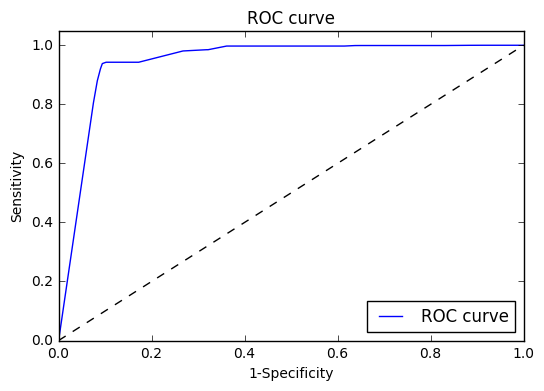

In [33]:
#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()